# Week 2 mini projects (array slicing & dealing with missing data)
File IO and Plotting using numpy, matplotlib.pyplot and pandas
This exercise includes several mini projects. All of these requires reading in data, selecting a portion of the data. Then plotting after removing the effects of missing data points. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Project 1. Download the excel sheet containing the historical weather station data from Seattle WA from https://o2.eas.gatech.edu/data/SEA_MonMeanTemp_1894_2020.xls

### This data contains missing values as -999. Avoid plotting the missing data.  Select the mean Februrary temperature from 1950 to 2020 and make a line plot. 


In [2]:
# read in data file as DataFrame using pandas
df2=pd.read_excel("https://o2.eas.gatech.edu/data/SEA_MonMeanTemp_1894_2020.xls",skiprows=1)
df2

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1894,38.8,38.2,42.7,48.0,53.4,58.7,64.3,65.9,57.6,50.2,47.4,39.3
1,1895,38.7,44.7,44.1,50.1,55.2,60.9,63.6,62.0,55.8,51.7,44.2,41.9
2,1896,42.4,44.9,42.7,46.9,52.4,60.2,67.2,63.9,56.7,52.8,38.4,44.5
3,1897,40.0,42.2,40.2,52.5,58.4,60.2,62.7,67.8,56.9,51.0,43.6,42.6
4,1898,39.9,45.6,43.4,50.1,57.1,61.4,64.6,66.3,60.8,52.2,45.0,40.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2016,43.5,47.7,49.4,56.3,59.2,63.6,67.0,68.6,61.4,55.4,51.3,38.5
123,2017,38.7,41.6,46.5,50.8,58.1,62.6,67.0,69.7,64.9,53.2,46.6,40.5
124,2018,44.9,41.4,46.2,50.6,60.8,62.0,70.0,68.5,62.3,53.4,48.2,43.5
125,2019,44.0,36.6,47.4,52.0,59.5,62.0,65.5,68.5,62.3,50.9,46.4,44.2


In [3]:
# Extract Feb temperature
sea=df2.to_numpy()
year_sea=sea[:,0]
feb_sea=sea[:,2]

In [4]:
# select the data range to be only within 1950 to 2020
index = (year_sea >= 1950) & (year_sea <= 2020)
year2 = year_sea[index]
feb2  = feb_sea[index]

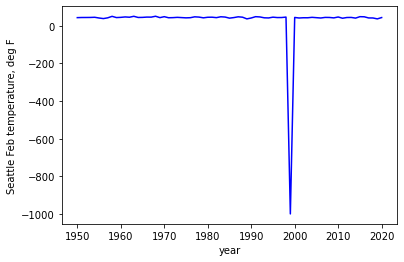

In [5]:
# plot the result using matplotlib
plt.plot(year2,feb2,'b-')
plt.xlabel('year')
plt.ylabel('Seattle Feb temperature, deg F')
plt.show()
# Oh no! the plot is ruined because there is a missing data (-999)

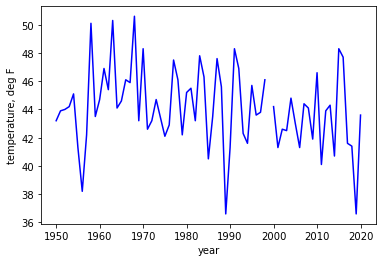

In [6]:
# first replace the missing data (-999) with np.nan
missing_index= (feb2 == -999) # first identify the missing data
feb2[missing_index]=np.nan

# then plot the result using matplotlib
plt.plot(year2,feb2,'b-')
plt.xlabel('year')
plt.ylabel('temperature, deg F')
plt.show()
# now we can see the stuff! 

## Project 2. Plot all 12 months of Seattle data as a contour plot
### use x-axis for year (1900-2020), y-axis for month (1-12), and color-filled contour for temperature. 
### Do the same for Seattle. You will have to remove the missing data
### For different choices of colormaps, please look at https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [7]:
# read in data file as DataFrame using pandas
df=pd.read_excel("https://o2.eas.gatech.edu/data/SEA_MonMeanTemp_1894_2020.xls",skiprows=1)

# Extract temperature for all 12 months
sea=df.to_numpy()
year=sea[:,0]   # first column
temp=sea[:,1:]  # 2nd column and all the rest

# select the years from 1900 to 2020
index = (year >= 1900) & (year <= 2020)
year1 = year[index]
temp1 = temp[index,:]

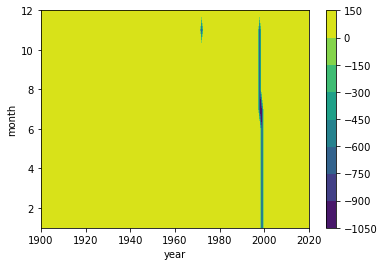

In [8]:
## contourf from matplotlib
mon=np.arange(1,13,1)
plt.contourf(year1,mon,temp1.T) 
plt.xlabel('year')
plt.ylabel('month')
plt.colorbar()
plt.show()
# Oh no! This is not working again! 

## Question 1. How can we fix this (deal with missing data)?

In [9]:
# Hint 1: remember how we removed the missing data from the line plot

## Question 2. Also, how can we change the color scheme for this plot?

In [10]:
# Hint 2: cmap is the key word for color scheme in contourf

## Project 3. Display histogram and Gaussian with missing data
### Display the histogram of mean July temperature of Seattle from 1900 to 2020, and overlay Gaussian function
Gaussian ($f(x)$, defined below) should be plotted scaled by $N \Delta x$.  
This is because the area of histogram is equal to sample size times bin width. 

$ f(x) = \frac{1}{\sqrt{2 \pi}\sigma} exp \left\{ -\frac{1}{2} \left( \frac{x-\mu}{\sigma} \right)^2\right\}$

In [11]:
# read in data file as DataFrame using pandas
df=pd.read_excel("https://o2.eas.gatech.edu/data/SEA_MonMeanTemp_1894_2020.xls",skiprows=1)

# Extract temperature for July months (8th column)
sea=df.to_numpy()
year=sea[:,0]   # first column
jul=sea[:,7]   # 13th column

# select the years from 1900 to 2020
index = (year >= 1900) & (year <= 2020)
jul1 = jul[index]

# in this case, remove the missing data 
jul1[jul1 == -999] = np.nan

In [12]:
# define bins
dx=1
bins=np.arange(np.min(jul1)-2,np.max(jul1)+2,dx)
plt.hist(jul1,bins)
plt.xlabel('temperature deg F')
plt.ylabel('data count, frequency')
plt.show()
# Oh no! I got an error message! What's wrong?

ValueError: arange: cannot compute length

In [ ]:
# calculate sample size
N=np.size(jul1)

# calculate mean and stdev
mu=np.nanmean(jul1)     # np.nanmean calculates mean value neglecting the nan values
sig=np.nanstd(jul1)     # np.nanstd calculates stdev value neglecting the nan values

# calculate Gaussian overlay
x=np.arange(np.nanmin(jul1)-2,np.nanmax(jul1)+2,.1)
f=N*dx/(np.sqrt(2*np.pi)*sig)*np.exp(-.5*((x-mu)/sig)**2)

In [ ]:
# replot the histogram
plt.hist(jul1,bins)
plt.plot(x,f,'r-') # plot the Gaussian
plt.xlabel('temperature, deg F')
plt.ylabel('data count, frequency')
plt.show()
# This works now!

## Project 4. Create a scatter plot comparing January temperature of Atlanta and Seattle between 1900 and 2020

In [ ]:
# read in data file as DataFrame using pandas
df=pd.read_excel("https://o2.eas.gatech.edu/data/ATL_MonMeanTemp_1879_2020.xls",skiprows=1)

# Extract temperature for Jan
atl=df.to_numpy()
year=atl[:,0]   # first column
jan=atl[:,1]   

# select the years from 1900 to 2020
index = (year >= 1900) & (year <= 2020)
janatl = jan[index]

In [ ]:
# read in data file as DataFrame using pandas
df=pd.read_excel("https://o2.eas.gatech.edu/data/SEA_MonMeanTemp_1894_2020.xls",skiprows=1)

# Extract temperature 
sea=df.to_numpy()
year=sea[:,0]   # first column
jan=sea[:,1]   

# select the years from 1900 to 2020
index = (year >= 1900) & (year <= 2020)
jansea= jan[index]

jansea[ jansea == -999 ] = np.nan

In [ ]:
plt.plot(janatl,jansea,'o')
plt.xlabel('Atlanta mean Jan temperature, deg F')
plt.ylabel('Seattle mean Jan temperature, deg F')
plt.show()

## Project 5. Save your result in a file
### case 1. create a dataframe from numpy array, selecting only June, July, August months and save it as a csv file

In [ ]:
# Take the Seattle data file from the previous project
# JJA will be 7th through 9th columns
# including all years
df3=pd.DataFrame(sea[:,[0,6,7,8]],columns=['Year','Jun','Jul','Aug'])
df3.to_csv('Seattle_JJA_1894_2020.csv') # this writes the data into a CSV file

In [ ]:
# have a look at the DataFrame
df3

### case 2. save multiple numpy arrays as .npz file
save the year and the temperature separately as different array into a single file

In [ ]:
year=sea[:,0]    # extract year 
temp=sea[:,1:13] # extract temperature from all months
np.savez('Seattle_MomMeanTemp.npz',year=year,temp=temp) # save the two arrays as a single file

# to read the data, use np.load
tempdata=np.load('Seattle_MomMeanTemp.npz') # returns a dictonary-like object
year1=tempdata['year']          # extract year
temp1=tempdata['temp']          # extract temperature